In [71]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/weather-prediction/seattle-weather.csv')

# Display the first few rows of the dataset
data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [72]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
data.describe()


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [73]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [74]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Handle categorical variables: 'weather'
data = pd.get_dummies(data, columns=['weather'], drop_first=True)

In [75]:
# Check for any remaining missing values
print(data.isnull().sum())

# Fill missing values if any
#data.fillna(method='ffill', inplace=True)

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather_fog      0
weather_rain     0
weather_snow     0
weather_sun      0
dtype: int64


In [76]:
# Extract features from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop('date', axis=1, inplace=True)

# Define features and target variable
X = data.drop('precipitation', axis=1)
y = data['precipitation']


In [77]:
X.head()

,temp_max,temp_min,wind,weather_fog,weather_rain,weather_snow,weather_sun,year,month,day
0,12.8,5.0,4.7,False,False,False,False,2012,1,1
1,10.6,2.8,4.5,False,True,False,False,2012,1,2
2,11.7,7.2,2.3,False,True,False,False,2012,1,3
3,12.2,5.6,4.7,False,True,False,False,2012,1,4
4,8.9,2.8,6.1,False,True,False,False,2012,1,5


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# LinearRegression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 27.386001226542856, MAE: 3.14598489680469


In [81]:
X_train

array([[-1.47525865, -2.27725991,  1.71071279, ...,  0.44800945,
         1.58815364, -1.56016973],
       [-0.3455831 ,  0.35154932,  2.12815262, ..., -0.44617334,
         0.71826144,  1.62161517],
       [-0.57696243, -0.42514431, -0.72435286, ...,  0.44800945,
        -1.02152297, -0.65108833],
       ...,
       [-0.11420378, -0.20607688, -0.79392617, ...,  0.44800945,
        -0.44159483, -0.65108833],
       [-1.47525865, -1.83912504,  0.11052679, ...,  1.34219223,
         1.58815364,  1.62161517],
       [-1.25748987, -0.98277052, -0.93307278, ...,  1.34219223,
        -1.6014511 ,  1.73525035]])

In [82]:
X_train.shape

(1168, 10)

# LSTM

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# X_train.shape : (1168, 10)
# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])) # (batch_size, timesteps, features)
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=10, activation='relu', input_shape=(1, X_train.shape[1]))) # (1 tinmestep, 10 features)
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

In [97]:
X_train_lstm

array([[[-1.47525865, -2.27725991,  1.71071279, ...,  0.44800945,
          1.58815364, -1.56016973]],

       [[-0.3455831 ,  0.35154932,  2.12815262, ..., -0.44617334,
          0.71826144,  1.62161517]],

       [[-0.57696243, -0.42514431, -0.72435286, ...,  0.44800945,
         -1.02152297, -0.65108833]],

       ...,

       [[-0.11420378, -0.20607688, -0.79392617, ...,  0.44800945,
         -0.44159483, -0.65108833]],

       [[-1.47525865, -1.83912504,  0.11052679, ...,  1.34219223,
          1.58815364,  1.62161517]],

       [[-1.25748987, -0.98277052, -0.93307278, ...,  1.34219223,
         -1.6014511 ,  1.73525035]]])

In [98]:
lstm_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 10)                840       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
37/37 [==============================] - 2s 11ms/step - loss: 55.6061 - val_loss: 46.2202
Epoch 2/50
37/37 [==============================] - 0s 4ms/step - loss: 54.8716 - val_loss: 45.5214
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 53.9871 - val_loss: 44.5737
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 52.7140 - val_loss: 43.1978
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 50.9865 - val_loss: 41.4450
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 48.8650 - val_loss: 39.4431
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 46.4442 - val_loss: 37.3682
Epoch 8/50
37/37 [==============================] - 0s 4ms/step - loss: 43.8816 - val_loss: 35.2601
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 41.3988 - val_loss: 33.2832
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 39.0920 - val_loss: 31.556

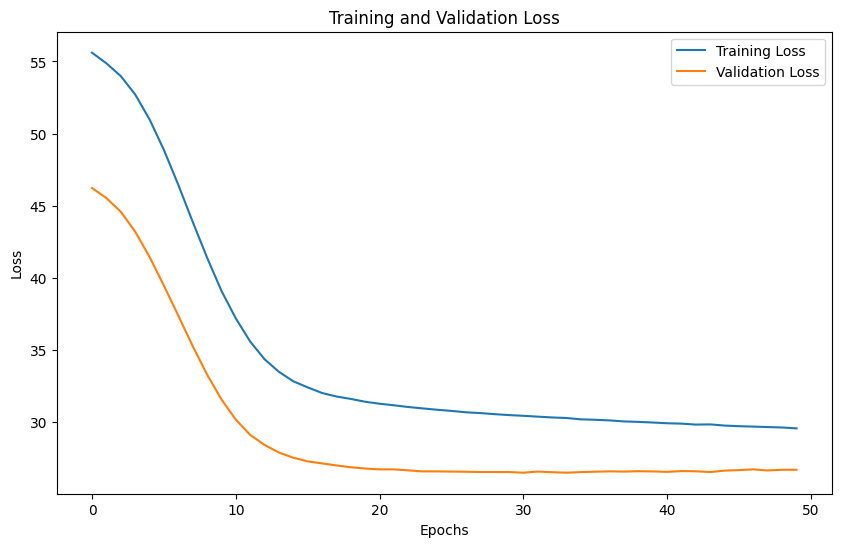

10/10 [==============================] - 0s 2ms/step
LSTM MSE: 26.672875608427077, MAE: 2.6753279702350143


In [99]:
import matplotlib.pyplot as plt

# Train the LSTM model and capture the history
history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test)
)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluation
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}, MAE: {mae_lstm}')

# Tanh activation

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# X_train.shape : (1168, 10)
# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])) # (batch_size, timesteps, features)
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=10, activation='tanh', input_shape=(1, X_train.shape[1]))) # (1 tinmestep, 10 features)
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

Epoch 1/50
37/37 [==============================] - 3s 19ms/step - loss: 54.8932 - val_loss: 45.4132
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 53.4581 - val_loss: 43.9960
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 51.8114 - val_loss: 42.3986
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 49.9393 - val_loss: 40.5365
Epoch 5/50
37/37 [==============================] - 0s 5ms/step - loss: 47.8534 - val_loss: 38.6035
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 45.6936 - val_loss: 36.6461
Epoch 7/50
37/37 [==============================] - 0s 4ms/step - loss: 43.6114 - val_loss: 34.8161
Epoch 8/50
37/37 [==============================] - 0s 5ms/step - loss: 41.6802 - val_loss: 33.3102
Epoch 9/50
37/37 [==============================] - 0s 4ms/step - loss: 40.0386 - val_loss: 31.9588
Epoch 10/50
37/37 [==============================] - 0s 4ms/step - loss: 38.5842 - val_loss: 30.883

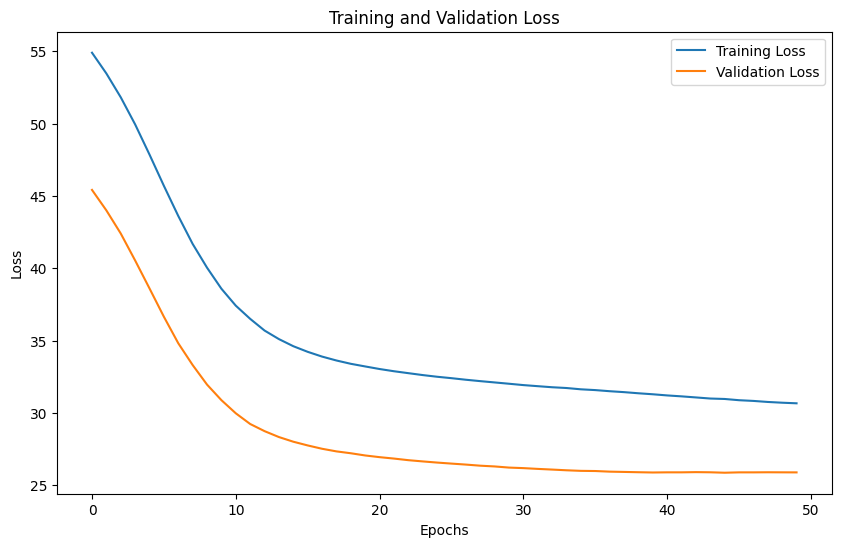

10/10 [==============================] - 0s 2ms/step
LSTM MSE: 25.8924757011684, MAE: 2.580733717769486


In [101]:
import matplotlib.pyplot as plt

# Train the LSTM model and capture the history
history = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test)
)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluation
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}, MAE: {mae_lstm}')

## LearningRateScheduler 사용

Epoch 1/50
37/37 [==============================] - 0s 6ms/step - loss: 33.5749 - val_loss: 29.2440 - lr: 0.1000
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 31.6945 - val_loss: 26.5772 - lr: 0.1000
Epoch 3/50
37/37 [==============================] - 0s 5ms/step - loss: 31.4928 - val_loss: 26.4272 - lr: 0.1000
Epoch 4/50
37/37 [==============================] - 0s 4ms/step - loss: 30.5837 - val_loss: 28.3035 - lr: 0.1000
Epoch 5/50
37/37 [==============================] - 0s 4ms/step - loss: 30.6560 - val_loss: 27.7469 - lr: 0.1000
Epoch 6/50
37/37 [==============================] - 0s 5ms/step - loss: 29.5100 - val_loss: 28.5179 - lr: 0.1000
Epoch 7/50
37/37 [==============================] - 0s 5ms/step - loss: 29.3100 - val_loss: 28.9003 - lr: 0.1000
Epoch 8/50
37/37 [==============================] - 0s 5ms/step - loss: 28.9791 - val_loss: 29.3222 - lr: 0.1000
Epoch 9/50
37/37 [==============================] - 0s 5ms/step - loss: 28.0111 - val_loss: 27.8

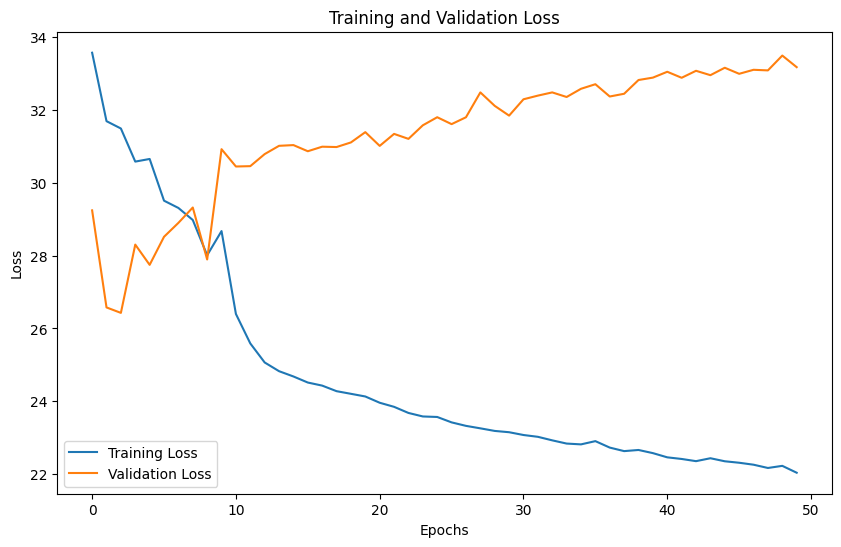

10/10 [==============================] - 0s 2ms/step
LSTM MSE: 33.17852741799424, MAE: 3.172756634718729


In [102]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch):
    # 10 epoch 이후 느리게
    if epoch < 10:
        return 0.1
    else:
        return 0.01

callback = LearningRateScheduler(scheduler)

history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32,
                validation_data=(X_test_lstm, y_test), callbacks=[callback], verbose=1)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
y_pred_lstm_sd = lstm_model.predict(X_test_lstm)

# Evaluation
mse_lstm = mean_squared_error(y_test, y_pred_lstm_sd)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm_sd)
print(f'LSTM MSE: {mse_lstm}, MAE: {mae_lstm}')

# Stacked LSTM 

In [103]:
# Build the LSTM model
lstm_model2 = Sequential()
lstm_model2.add(LSTM(units=10, return_sequences = True, activation='tanh', input_shape=(1, X_train.shape[1]))) # (1 tinmestep, 10 features)
# return_sequences = True 시퀀스 반환하도록
lstm_model2.add(LSTM(units=10, return_sequences = False))
lstm_model2.add(Dense(1))
lstm_model2.compile(optimizer='adam', loss='mse')

In [104]:
lstm_model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 1, 10)             840       
                                                                 
 lstm_20 (LSTM)              (None, 10)                840       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,691
Trainable params: 1,691
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
37/37 [==============================] - 6s 32ms/step - loss: 55.2810 - val_loss: 45.9764
Epoch 2/50
37/37 [==============================] - 0s 6ms/step - loss: 54.4826 - val_loss: 45.0764
Epoch 3/50
37/37 [==============================] - 0s 6ms/step - loss: 53.1126 - val_loss: 43.4245
Epoch 4/50
37/37 [==============================] - 0s 7ms/step - loss: 50.6973 - val_loss: 40.5091
Epoch 5/50
37/37 [==============================] - 0s 6ms/step - loss: 46.8321 - val_loss: 36.6886
Epoch 6/50
37/37 [==============================] - 0s 6ms/step - loss: 42.4132 - val_loss: 33.2975
Epoch 7/50
37/37 [==============================] - 0s 6ms/step - loss: 39.2232 - val_loss: 31.1335
Epoch 8/50
37/37 [==============================] - 0s 6ms/step - loss: 37.3236 - val_loss: 29.9101
Epoch 9/50
37/37 [==============================] - 0s 6ms/step - loss: 36.1823 - val_loss: 29.1673
Epoch 10/50
37/37 [==============================] - 0s 6ms/step - loss: 35.4889 - val_loss: 28.674

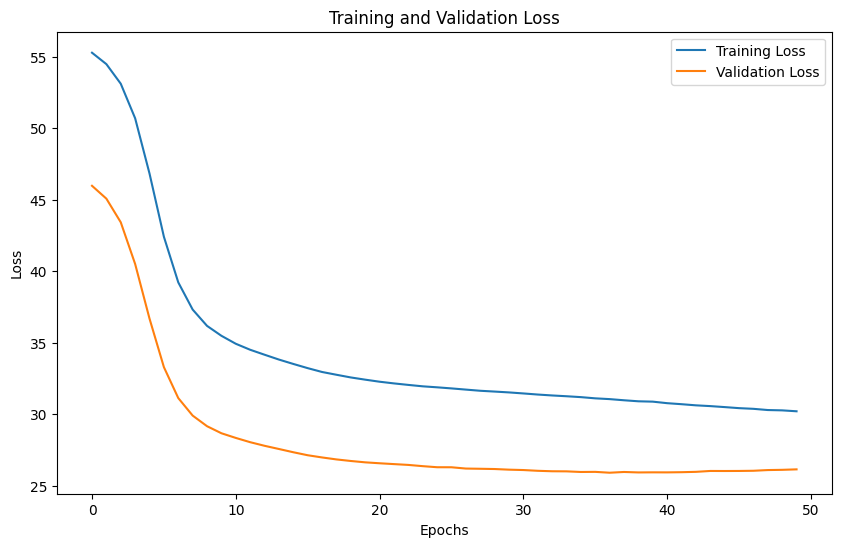

10/10 [==============================] - 1s 3ms/step
LSTM MSE: 26.149805120551953, MAE: 2.545006601680261


In [105]:
# Train the LSTM model and capture the history
history2 = lstm_model2.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test)
)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
y_pred_lstm = lstm_model2.predict(X_test_lstm)

# Evaluation
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}, MAE: {mae_lstm}')

# DecisionTreeRegressor

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize and train the model
model = DecisionTreeRegressor()
history = model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

MSE: 55.9478156996587, MAE: 3.351194539249147


# GRU

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
# X_train.shape : (1168, 10)
# Reshape data for 
#X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])) # (batch_size, timesteps, features)
#X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
gru_model = Sequential()
gru_model.add(GRU(units=10, activation='tanh', input_shape=(1, X_train.shape[1]))) # (1 tinmestep, 10 features)
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

In [116]:
gru_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 10)                660       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
37/37 [==============================] - 3s 18ms/step - loss: 56.3565 - val_loss: 46.4334
Epoch 2/50
37/37 [==============================] - 0s 5ms/step - loss: 54.4943 - val_loss: 44.7449
Epoch 3/50
37/37 [==============================] - 0s 4ms/step - loss: 52.4944 - val_loss: 42.7957
Epoch 4/50
37/37 [==============================] - 0s 5ms/step - loss: 50.1980 - val_loss: 40.6653
Epoch 5/50
37/37 [==============================] - 0s 5ms/step - loss: 47.8368 - val_loss: 38.4742
Epoch 6/50
37/37 [==============================] - 0s 4ms/step - loss: 45.4081 - val_loss: 36.4529
Epoch 7/50
37/37 [==============================] - 0s 5ms/step - loss: 43.1520 - val_loss: 34.4652
Epoch 8/50
37/37 [==============================] - 0s 5ms/step - loss: 41.1081 - val_loss: 32.7512
Epoch 9/50
37/37 [==============================] - 0s 5ms/step - loss: 39.3724 - val_loss: 31.4491
Epoch 10/50
37/37 [==============================] - 0s 5ms/step - loss: 37.9526 - val_loss: 30.410

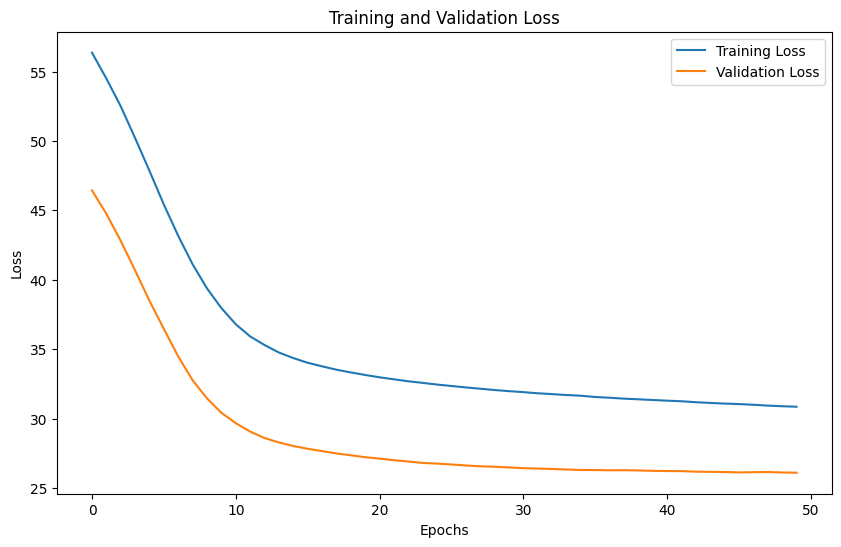

10/10 [==============================] - 0s 2ms/step
LSTM MSE: 26.09342120898149, MAE: 2.6643679604188577


In [117]:
import matplotlib.pyplot as plt

# Train the LSTM model and capture the history
history = gru_model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test)
)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
y_pred_lstm = gru_model.predict(X_test_lstm)

# Evaluation
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}, MAE: {mae_lstm}')

- LSTM(tanh) MSE: 25.8924757011684, MAE: 2.580733717769486
- GRU MSE: 26.09342120898149, MAE: 2.6643679604188577